In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# Naive approach

In [2]:
naive = sc.read_h5ad("/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/human_pancreas/pancreas_raw.h5ad")

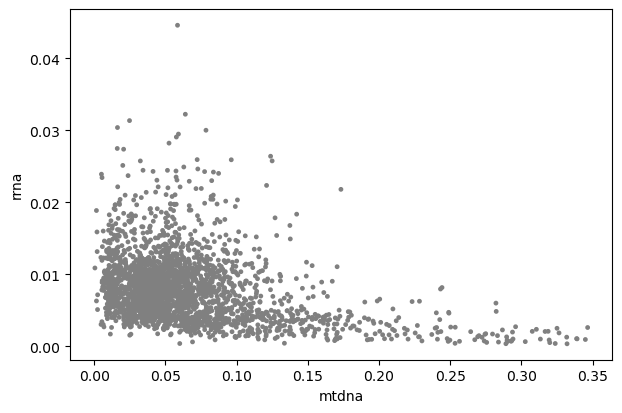

In [3]:
sc.pl.scatter(naive, "mtdna", "rrna")

In [4]:
sc.pp.normalize_per_cell(naive, counts_per_cell_after=None)
sc.pp.log1p(naive)
sc.pp.highly_variable_genes(naive)
sc.pp.pca(naive, use_highly_variable=True, chunked=True)
sc.pp.neighbors(naive, metric="cosine")
sc.tl.umap(naive)

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packag

In [5]:
naive.obs.columns

Index(['Characteristics[individual]', 'age', 'Characteristics [sex]',
       'Factor Value [inferred cell type - ontology labels]',
       'Characteristics[disease]', 'Characteristics[body mass index]',
       'Characteristics[cause of death]', 'mtdna', 'rrna', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'n_counts'],
      dtype='object')

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No d

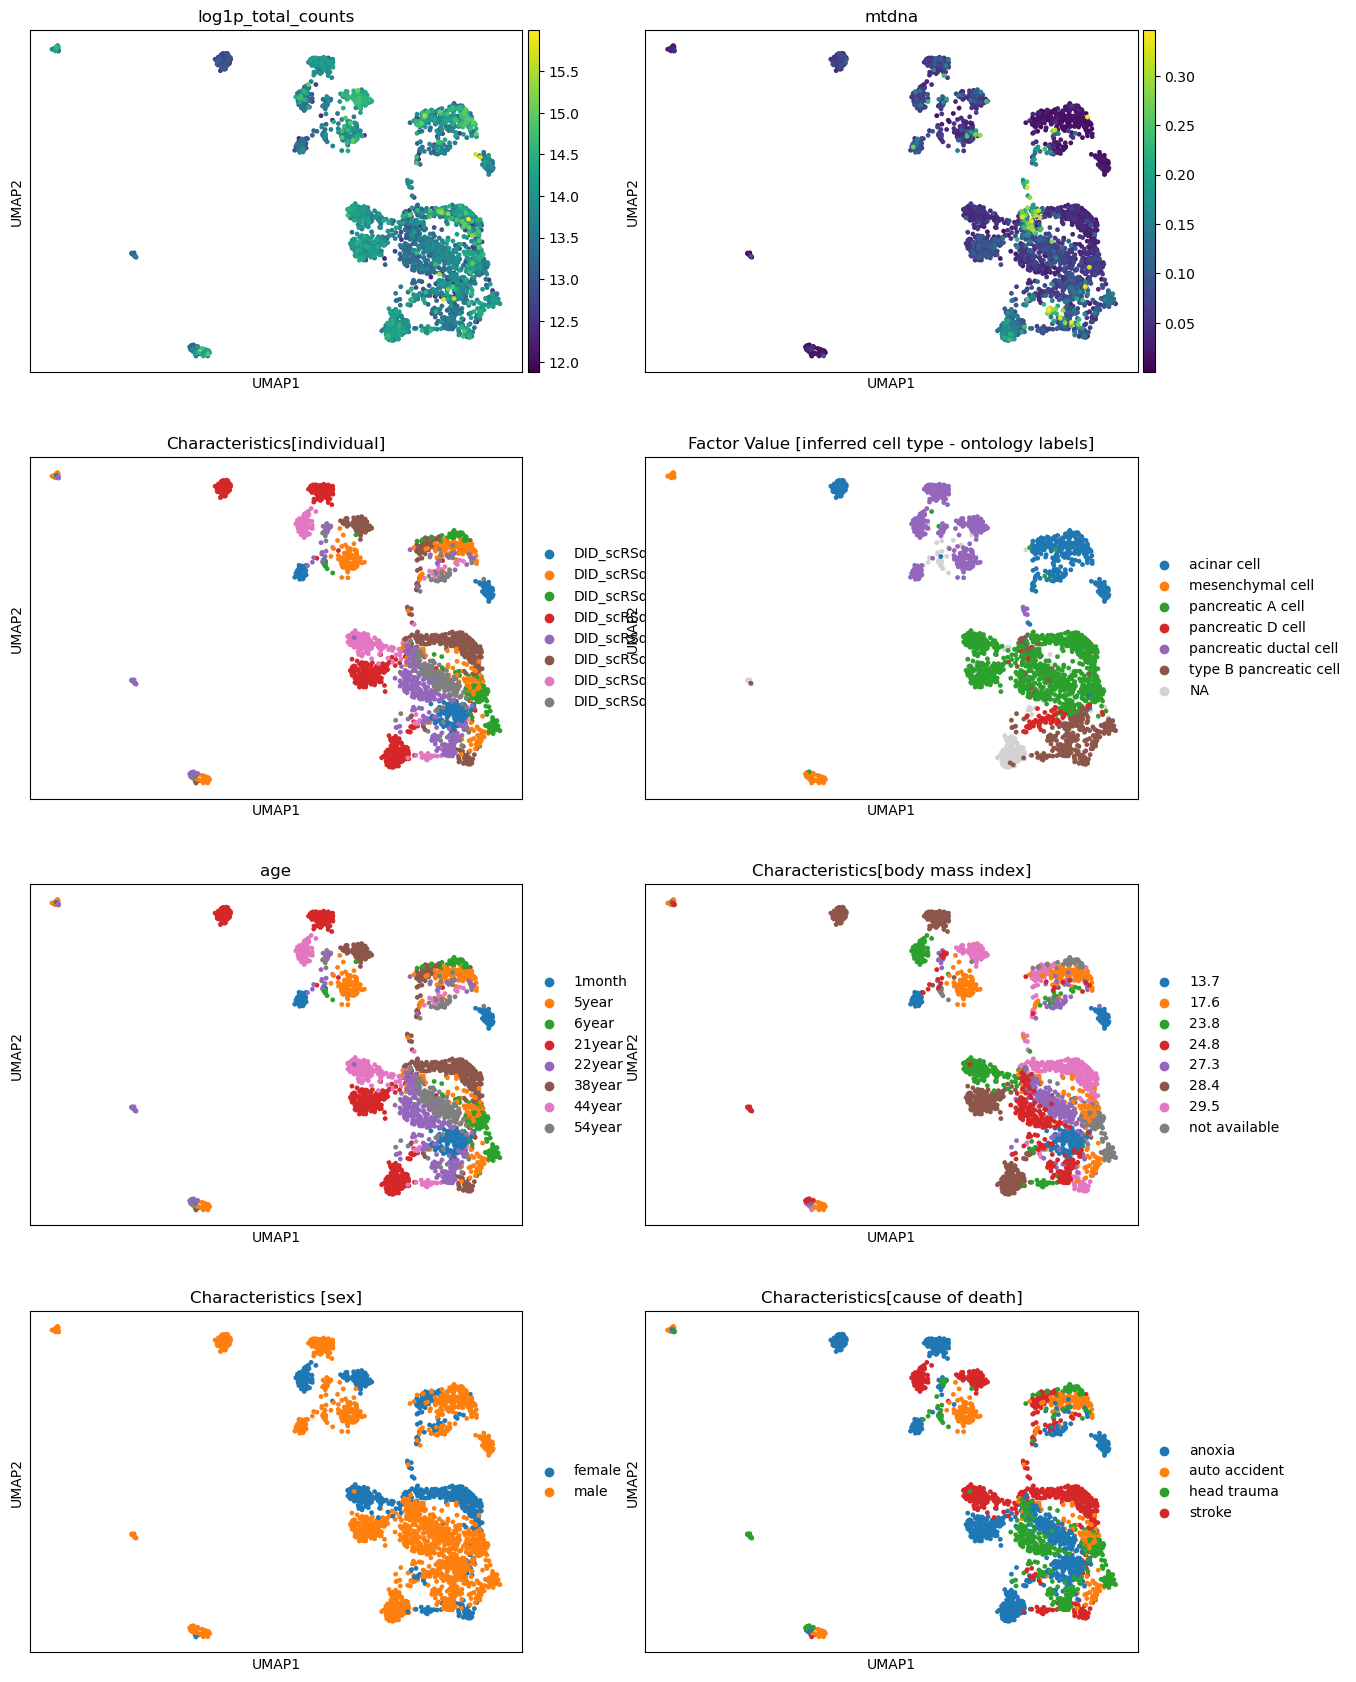

In [6]:
sc.pl.umap(naive, ncols=2,
           color=[
               "log1p_total_counts",
               "mtdna",
               "Characteristics[individual]",
               "Factor Value [inferred cell type - ontology labels]",
               "age",
               "Characteristics[body mass index]",
               "Characteristics [sex]",
               "Characteristics[cause of death]"
           ])

# Subsampling

In [7]:
downsampling = sc.read_h5ad("/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/human_pancreas/pancreas_raw.h5ad")

In [8]:
# downsampling.obs["total_counts"].hist(bins=50, by=downsampling.obs["Characteristics[individual]"]);

In [9]:
sc.pp.downsample_counts(downsampling, counts_per_cell=500000)

In [10]:
sc.pp.normalize_per_cell(downsampling, counts_per_cell_after=None)
sc.pp.log1p(downsampling)
sc.pp.highly_variable_genes(downsampling)
sc.pp.pca(downsampling, use_highly_variable=True, chunked=True)
sc.pp.neighbors(downsampling, metric="cosine")
sc.tl.umap(downsampling)

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax

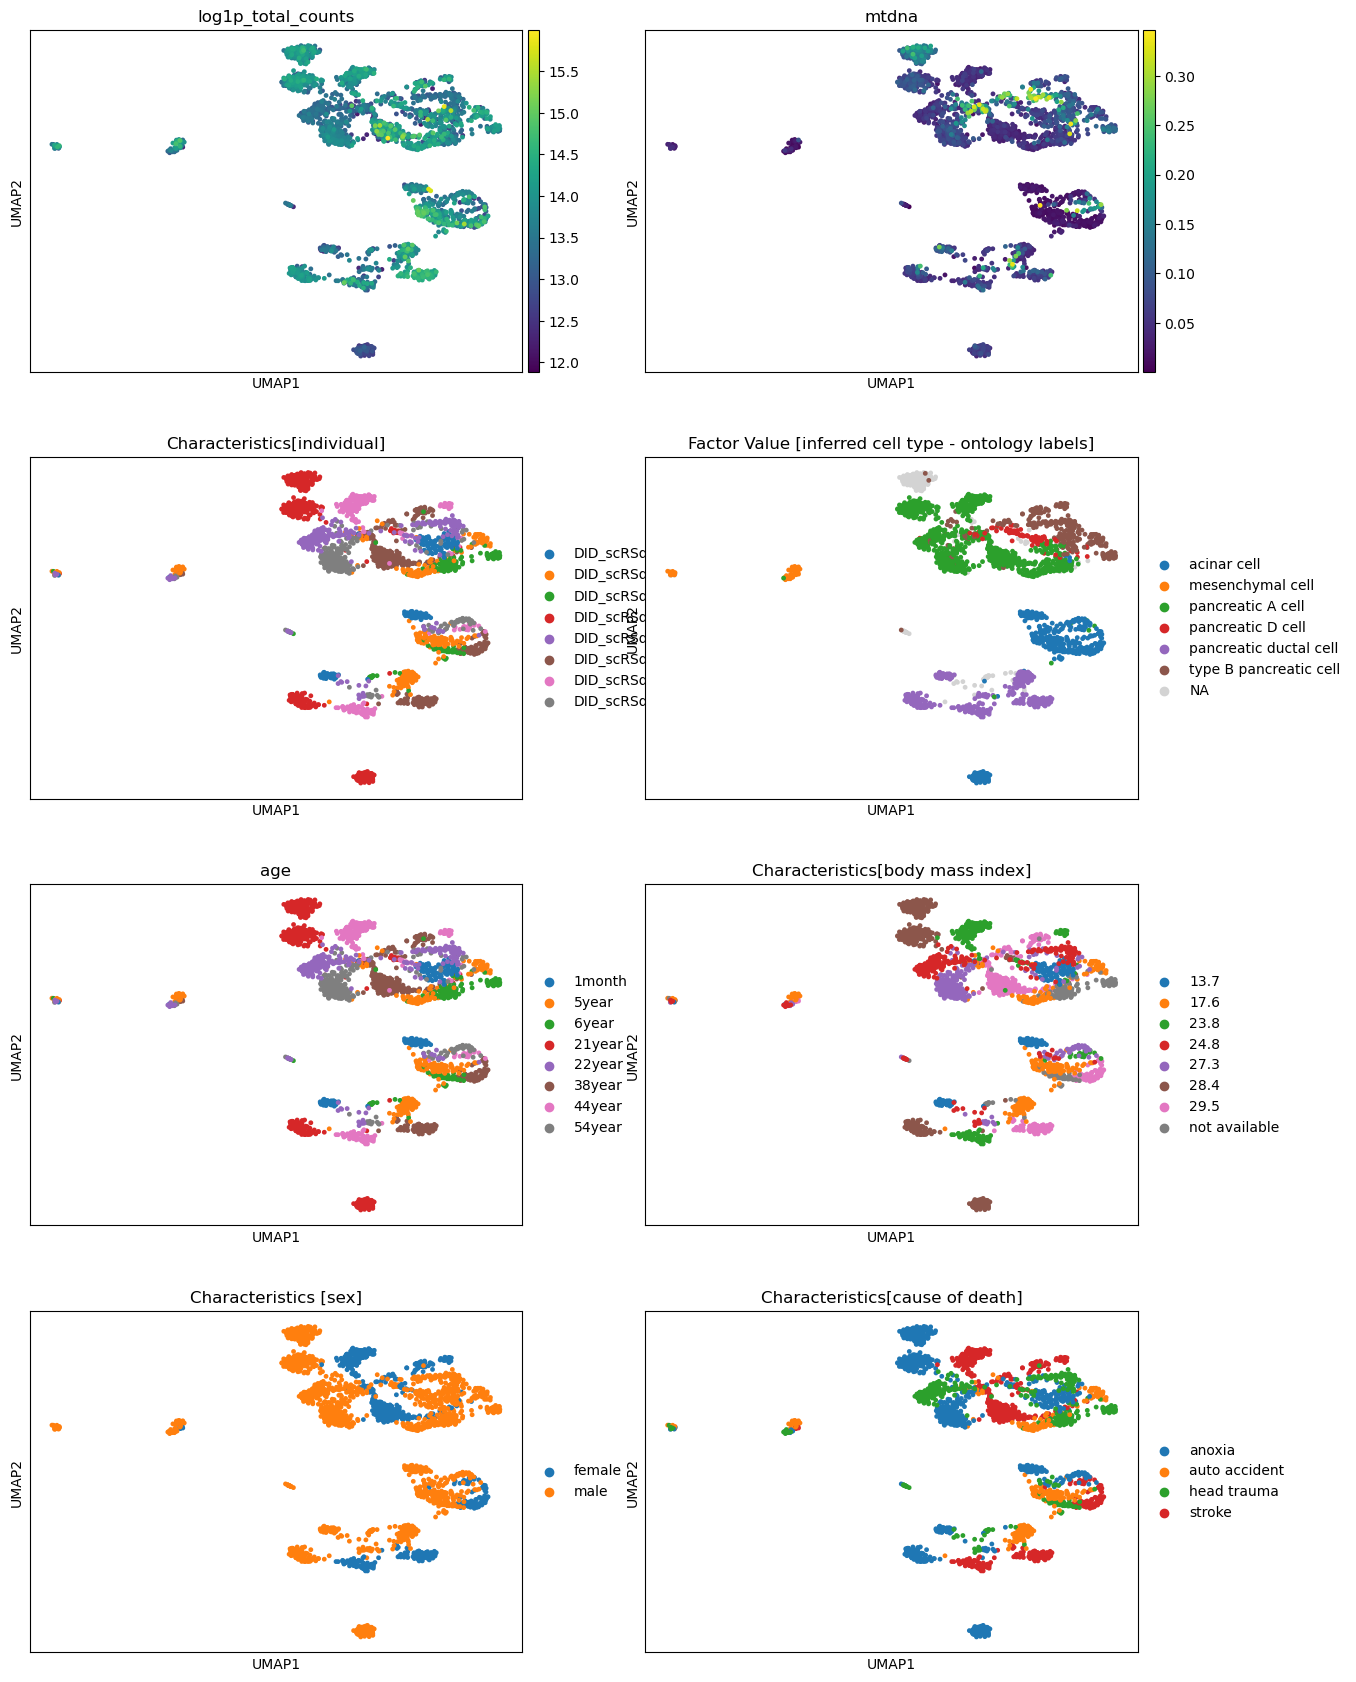

In [11]:
sc.pl.umap(downsampling, ncols=2,
           color=[
               "log1p_total_counts",
               "mtdna",
               "Characteristics[individual]",
               "Factor Value [inferred cell type - ontology labels]",
               "age",
               "Characteristics[body mass index]",
               "Characteristics [sex]",
               "Characteristics[cause of death]"
           ])

# BBKNN

In [12]:
bbknn = sc.read_h5ad("/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/human_pancreas/pancreas_raw.h5ad")

In [13]:
sc.pp.normalize_total(bbknn, target_sum=None)
sc.pp.log1p(bbknn)
sc.pp.highly_variable_genes(bbknn)
sc.pp.pca(bbknn, use_highly_variable=True)

In [14]:
sc.external.pp.bbknn(bbknn, batch_key="Characteristics[individual]")

In [15]:
sc.tl.umap(bbknn, min_dist=0.1)

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


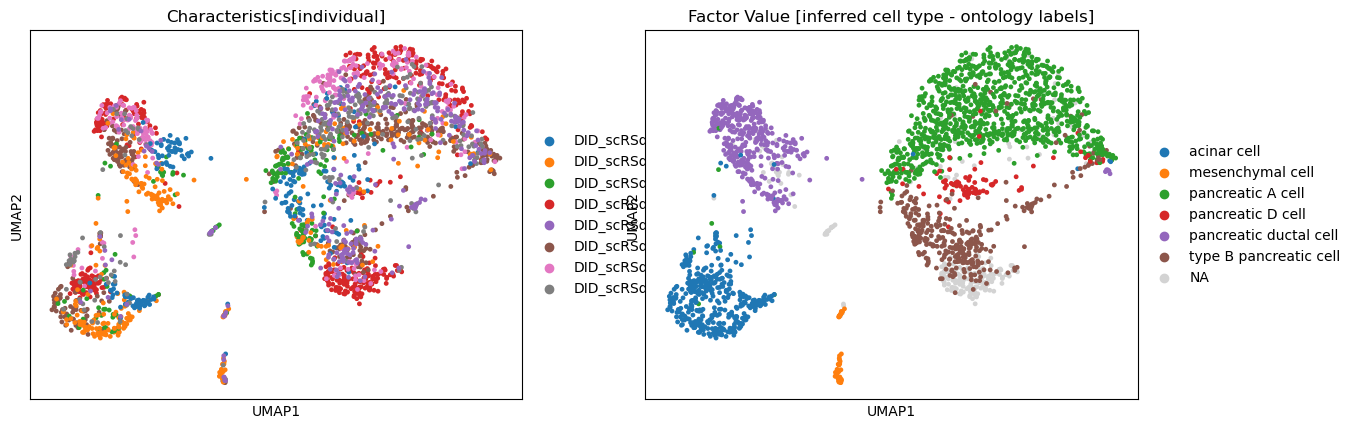

In [16]:
sc.pl.umap(bbknn, ncols=2,
           color=["Characteristics[individual]",
               "Factor Value [inferred cell type - ontology labels]",
           ])

# Regression

In [17]:
regression = sc.read_h5ad("/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/human_pancreas/pancreas_raw.h5ad")

In [18]:
sc.pp.regress_out(regression, keys=["Characteristics[individual]"])

In [19]:
sc.pp.normalize_per_cell(regression)

In [20]:
sc.pp.pca(regression)
sc.pp.neighbors(regression)
sc.tl.umap(regression)

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


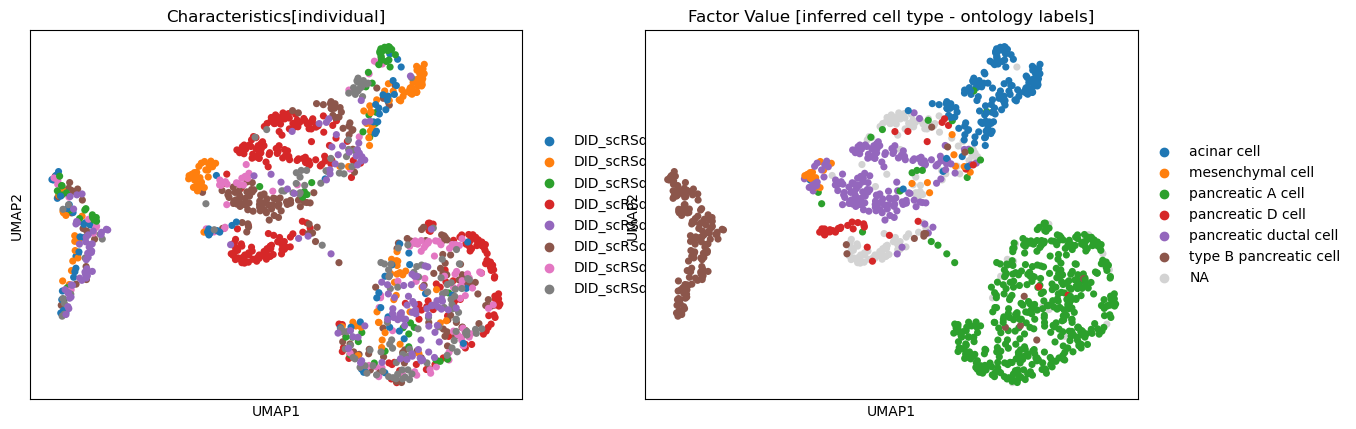

In [21]:
sc.pl.umap(regression, ncols=2,
           color=["Characteristics[individual]",
               "Factor Value [inferred cell type - ontology labels]",
           ])

# Harmony

In [22]:
harmony = sc.read_h5ad("/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/human_pancreas/pancreas_raw.h5ad")

In [23]:
sc.pp.normalize_per_cell(harmony)
sc.pp.log1p(harmony)
sc.pp.highly_variable_genes(harmony)
sc.pp.pca(harmony, use_highly_variable=True, n_comps=50, chunked=True)

In [24]:
sc.external.pp.harmony_integrate(harmony, key="Characteristics[individual]")

2023-06-19 12:49:34,907 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-06-19 12:49:35,556 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-06-19 12:49:35,572 - harmonypy - INFO - Iteration 1 of 10
2023-06-19 12:49:35,865 - harmonypy - INFO - Iteration 2 of 10
2023-06-19 12:49:36,154 - harmonypy - INFO - Iteration 3 of 10
2023-06-19 12:49:36,428 - harmonypy - INFO - Iteration 4 of 10
2023-06-19 12:49:36,700 - harmonypy - INFO - Iteration 5 of 10
2023-06-19 12:49:36,922 - harmonypy - INFO - Iteration 6 of 10
2023-06-19 12:49:37,114 - harmonypy - INFO - Iteration 7 of 10
2023-06-19 12:49:37,269 - harmonypy - INFO - Iteration 8 of 10
2023-06-19 12:49:37,447 - harmonypy - INFO - Iteration 9 of 10
2023-06-19 12:49:37,733 - harmonypy - INFO - Iteration 10 of 10
2023-06-19 12:49:37,887 - harmonypy - INFO - Stopped before convergence


In [25]:
sc.pp.neighbors(harmony, use_rep="X_pca_harmony")
sc.tl.umap(harmony)

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


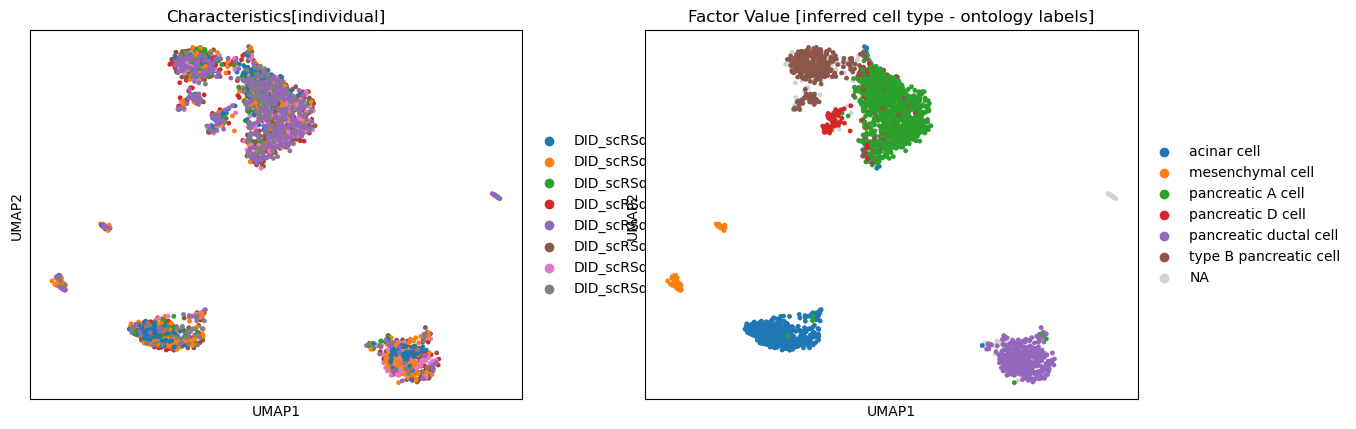

In [26]:
sc.pl.umap(harmony, ncols=2,
           color=["Characteristics[individual]",
               "Factor Value [inferred cell type - ontology labels]",
           ])